For fitting the twilight, we have several potential problems to overcome:
* None of the instruments are currently zeropointed
* The observations are contaminated by other sources of light (e.g., zodiacal light and the Milky Way)

We can fit the zenith sky flux with the fucntion:
$f^z(\alpha) = f_{ratio}f_{dark}10^{A(\alpha+12) } + f_{dark}$

where $f_{ratio} = f^z_{12}/f^z_{dark}$, $f^z_{dark}$ is the zenith flux from all the other sky components, $\alpha$ is the sun's altitude, $f_{12}$ is the twilight flux when the sun is at an altitude of -12 degrees, and $A$ is the slope.

The twilight component at zenith in magnitudes then becomes:

$m^z_{twi} = -2.5{\rm{log}}_{10}f_{rat} -2.5A(\alpha+12) + m_{dark}^z$


We can then expand to include the airmass ($X$) and azimuth ($\theta$) components.  For the hemisphere facing away from the sun (  $ \pi/2 < \theta < 3\pi/2$), the brightness is only dependent on the altitude so:

$f_{twi}^{away}(\alpha, X) = f_{ratio}f_{dark}10^{A(\alpha+12)+B(X-1) } $

And for the direction facing the sun:

$f_{twi}^{twords}(\alpha, X, \theta) = f_{twi}(\alpha, X)10^{C\cos{\theta}(X-1)}$

This is the most stupid-simple function I could come up with. We have enough data that we can easily add more parameters (but this does actually seem to work pretty well).

<h2>What about the variations in twilight levels</h2>

The twilight is caused by multiple scatterings of solar photons. Therefore, small variations in the composition of the upper atmosphere, or presence of clouds beyond the horizon can drastically increase or decrease the twlight flux.  

This model is a fit to the median conditions. In theory, a real time sky monitor would show if the sky background was higher or lower than the model values. For simulating the scheduler, we can either add/subtract flux to simulate the weather.  But even if we assume the sky matches the simlified model, things should even out.  In the sim, observations will always procede until a sun altitude of -12 degrees (say), while the actual survey will sometimes be able to extend to -11 degrees, and other times be forced to close at -10 degrees.  

<h2>Fitting the Twilight </h2>

Here are the results of selecting observations from the Cannon camera. Only observations where the moon is below the horizon are included.  The data were median binned in sky patches with fixed airmass and azimuth relative to the sun.  

At low airmass, there is little scatter (i.e., little variation with airmass or direction), and the curves are well fit with simple exponential decays plus a constant.  At higher airmass, we see scatter from the azimuthal variation.

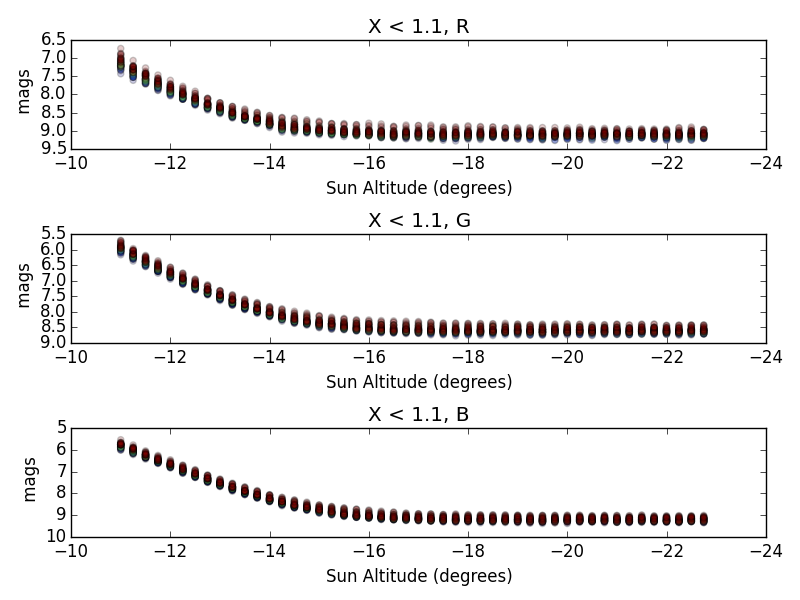

In [2]:
from IPython.display import Image
Image(filename='../examples/Plots/altDecay.png')


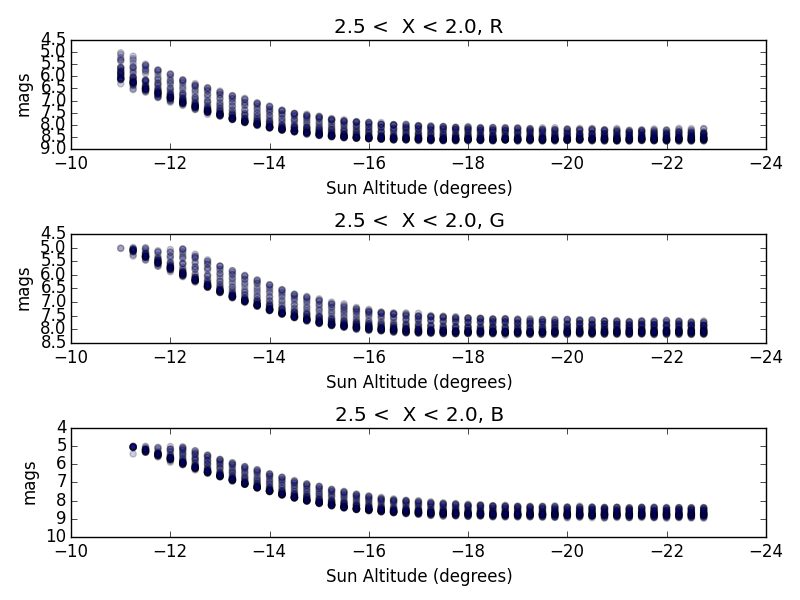

In [3]:
Image(filename='../examples/Plots/altDecayHA.png')

Here is the data from the photodiode detectors (pointed at zenith).  The raw data is in black, and median bins in yellow.  The blue solid line shows a exponential decay plus constant model fit and the green line shows sun altitude of -12 degrees.  Again, this has been selected to only include times when the moon is down.

it's concerning that the photodiode $r$ filter is so mis-matched to the Cannon $R$.  I'd say this looks like a time shift, but I'm including sunrise and sunset, so it's probably not that simple.

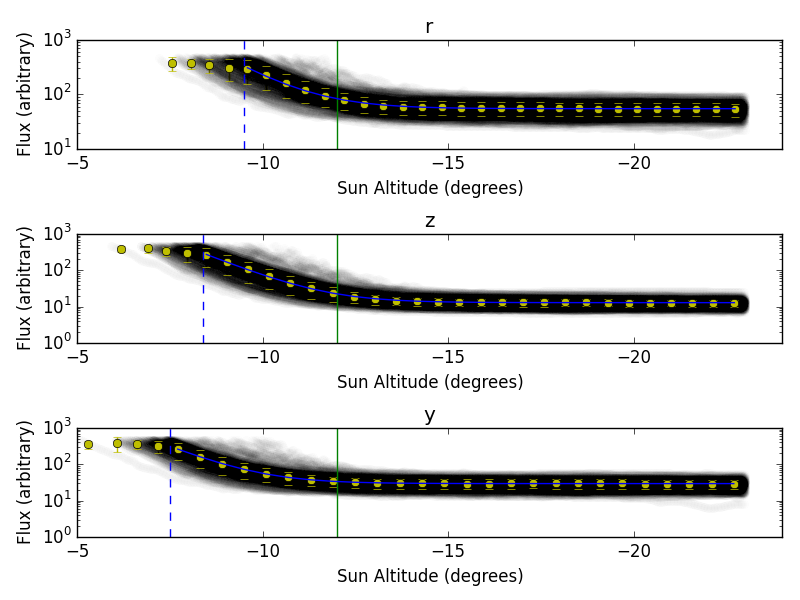

In [5]:
Image(filename='../examples/Plots/diode.png')

Results from fitting the sky brightness:

Filter | $\frac{f_{12}}{f_{dark}}$ | slope ($A$) | airmass term ($B$) | az term ($C$)
--------|----------|-----
$y$   |  0.13      | 23.4 
$z$   |  0.74      | 23.4 
$r$   | 0.52       | 22.5 
Cannon $R$ | 1.78 | 21.8 | 0.30 | 0.33
$G$   |  4.05      | 22.7 | 0.30 | 0.31
$B$   | 6.65       | 23.1 | 0.28 | 0.30

the $\frac{f_{12}}{f_{dark}}$ is just the zenith twilight flux from the sun when the sun is at an altitude of -12 degrees divided by the median dark-time flux. So, in the Cannon $B$, the zenith 12-degree twilight is 6.65x brighter than the dark sky level.  The $A$ term is the slope of the fitted line (units of magnitudes/-2.5 per radian of sun altitude).  

The $r$ fits seem to be outliers, although I'm also suspicous of the $y$ fit that says the 12-degree zenith twilight component is only 13% the dark sky value (That would seem to suggest we could easily push beyond 12 degree twilight in $y$?).  Maybe that's true and it's just counter-intuitive to my blue-biased eyes.

If we look at the spatial distribution of the sky brightness (sun at the bottom of the plot), we get this:

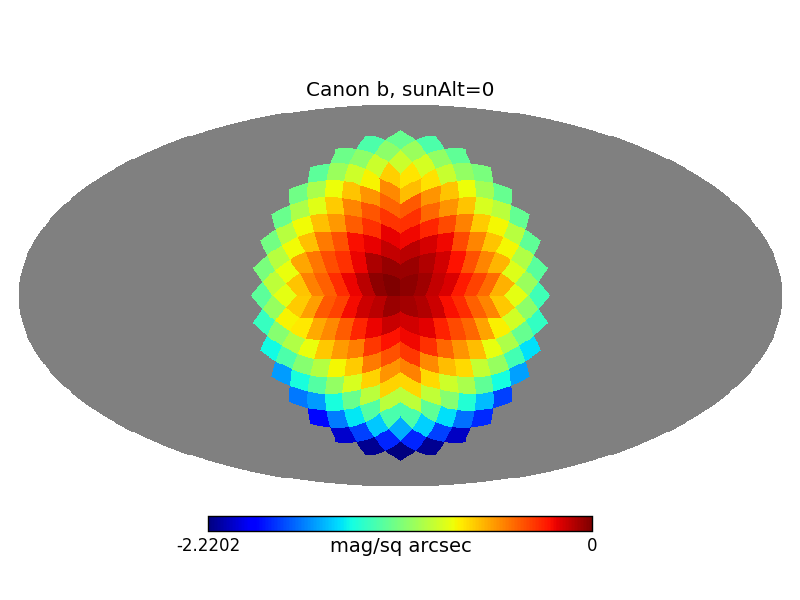

In [6]:
Image(filename='../examples/Plots/magMap_b.png')

Note that, for each of those pixels, the sky brightness exponentially decays as the sun sets.  Also, the variation on the hemisphere away from the sun shows variation only in the altitude.  Only the direction facing the sun has azimuthal variation.